## KMEANS Clustering

In [1]:
import numpy as np
import  pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 1000, centers=3, n_features=3, random_state=1)

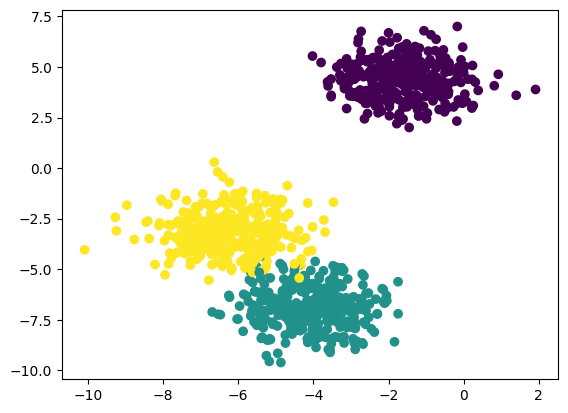

In [6]:
plt.scatter(x[:,0],x[:,1], c=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [9]:
x_train.shape, x_test.shape

((700, 3), (300, 3))

How better the model is :-

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [11]:
kmeans.fit(x_train) #fit_predict

KMeans(n_clusters=3)

In [12]:
y_labels = kmeans.predict(x_train)

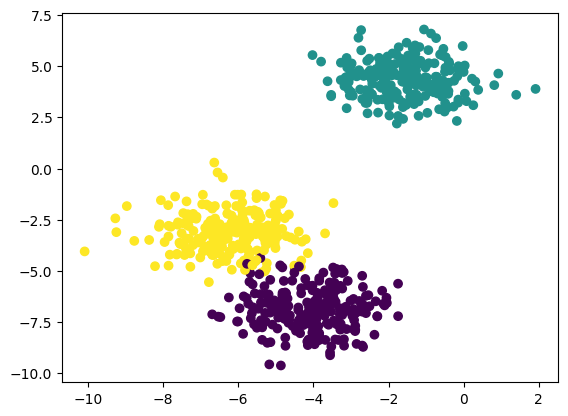

In [13]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_labels)

In [15]:
#how better the clustering model is

from sklearn.metrics import silhouette_score
silhouette_score(x_train, kmeans.labels_)

np.float64(0.7372346659329644)

In [16]:
kmeans.labels_

array([2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,

In [17]:
kmeans.inertia_ #for k=3, you have wcss distance

2044.6286247442317

In [19]:
# how to select K - elbow method
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
wcss

[27728.7379999748,
 8541.046125847986,
 2044.6286247442317,
 1913.769592675325,
 1722.002325970056,
 1559.8915926667073,
 1421.6325126781703,
 1344.4878595743771,
 1210.7468430192678]

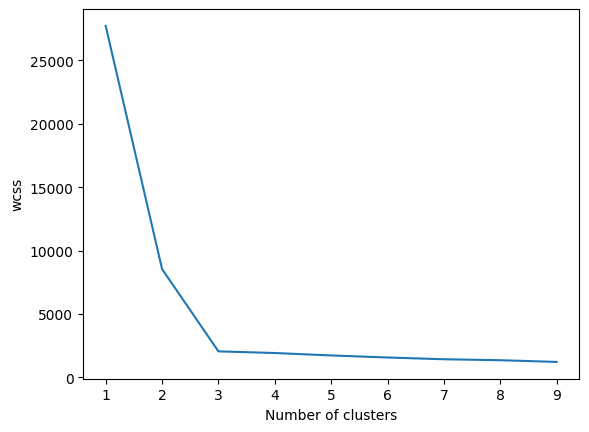

In [22]:
plt.plot(range(1,10), wcss)
plt.xticks(range(1,10))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

* #based on the above plot the optimal no of k cluster is 3

In [25]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [ ]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 10), wcss, curve='convex', direction = 'decreasing')

In [ ]:
k1.elbow

In [ ]:
silhouette_coeff = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coeff.append(score)

In [ ]:
silhouette_coeff

## HIERARCHICAL Clustering

In [33]:
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
x_scaled = scaler.fit_transform(x)

In [36]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(x_scaled)

In [37]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

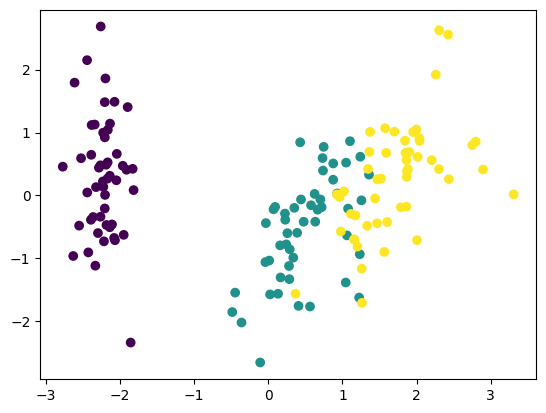

In [38]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=y)

Text(0, 0.5, 'Euclidean distance')

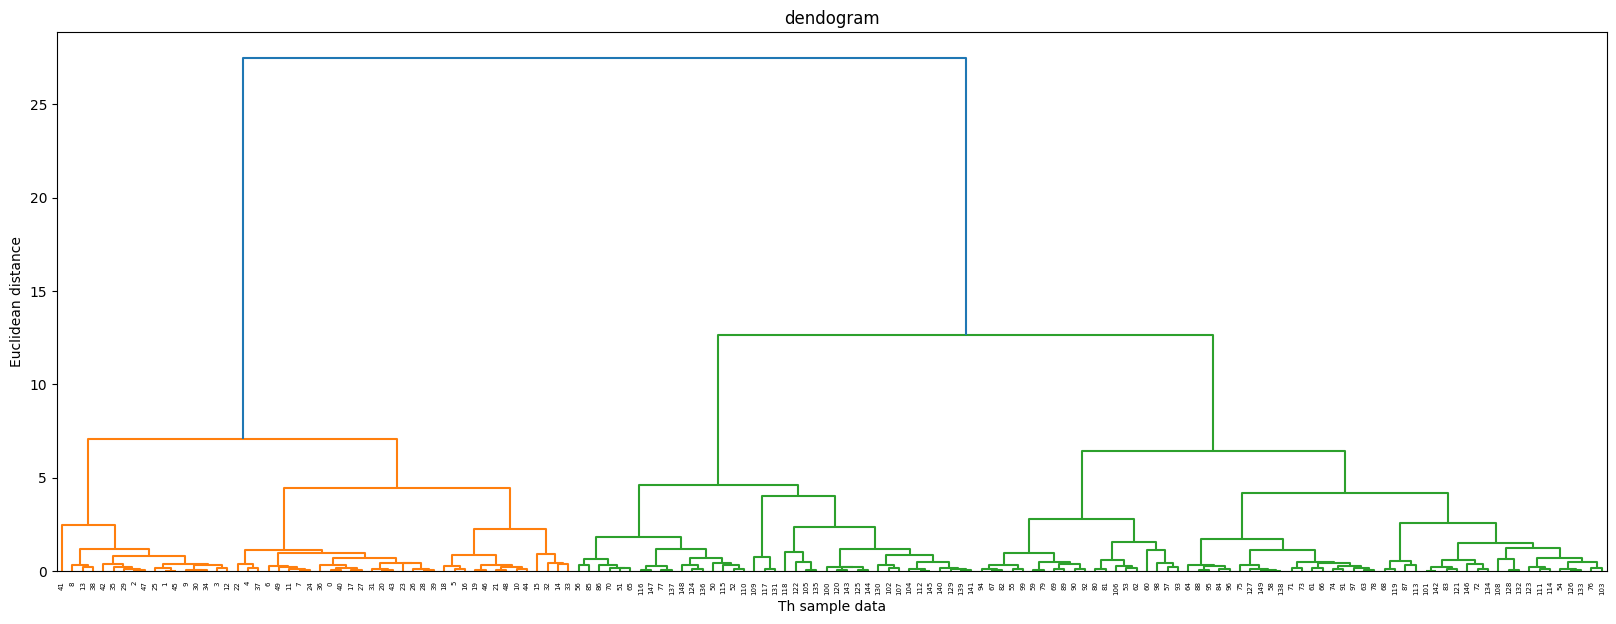

In [40]:
import scipy.cluster.hierarchy as sc 
plt.figure(figsize=(20,7))
plt.title('dendogram')
sc.dendrogram(sc.linkage(pca_scaled, method = "ward"))
plt.xlabel("Th sample data")
plt.ylabel("Euclidean distance")

In [39]:
from sklearn.metrics import silhouette_score
silhouette_coeff = []
for k in range(2, 10):
    agglo = AgglomerativeClustering(n_clusters=k, affinity = "euclidean", linkage = "ward")
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coeff.append(score)
    

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
silhouette_coeff

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [42]:
x, y = make_moons(n_samples=250, noise = 0.10)

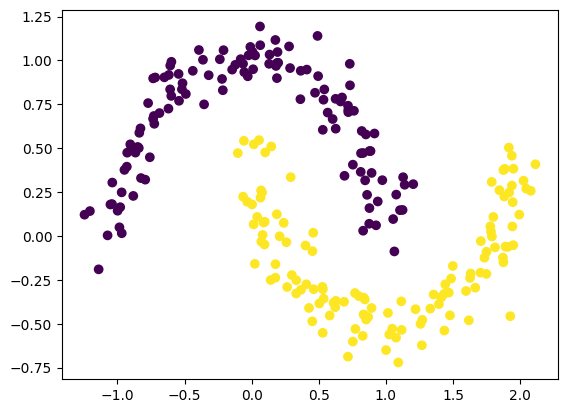

In [44]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.27033354e+00, -1.10977420e+00],
       [-1.68937960e+00, -4.00462552e-03],
       [-6.38698937e-01,  5.73782906e-01],
       [ 3.74059911e-01,  6.83834821e-01],
       [-2.00851400e+00, -2.54467739e-01],
       [ 1.09194468e+00, -1.03450228e+00],
       [ 1.46124291e-01, -1.29151428e+00],
       [ 4.00973884e-01, -1.20475648e+00],
       [ 1.39473578e+00, -9.04523923e-01],
       [-1.88702669e+00, -8.67072680e-01],
       [ 3.16149246e-01, -1.13277455e+00],
       [ 9.63080703e-01, -1.30795127e+00],
       [-1.40110247e+00,  1.28399246e+00],
       [-5.83255446e-01,  1.62632376e+00],
       [ 2.55497297e-01, -1.84567857e+00],
       [-9.84613898e-02,  1.37240474e+00],
       [-4.18087649e-01,  1.54081394e+00],
       [ 4.83590128e-01,  6.55784005e-01],
       [ 4.97100712e-01, -3.73453848e-01],
       [ 4.53944927e-02,  1.03444709e+00],
       [-1.66556713e+00,  2.47651524e-01],
       [-1.41276748e+00,  8.51946144e-01],
       [-1.89521871e-01, -1.13791249e+00],
       [ 1.

In [46]:
dbscan = DBSCAN(eps = 0.2, min_samples=5)

In [47]:
dbscan.fit(x_scaled)

DBSCAN(eps=0.2)

In [48]:
dbscan.labels_

array([ 0,  1,  7,  6, -1,  0,  0,  0,  0, -1,  0,  0,  2,  2, -1,  2,  2,
        6, -1,  3,  2,  2,  0,  4,  3,  4,  4,  5,  2,  6,  2,  2,  2,  1,
        0,  0,  7,  4,  2,  0, -1,  3,  0,  0,  6,  0,  3,  2, -1,  0,  0,
        0,  0,  0,  2,  3,  4,  0,  0,  0, -1,  2,  2,  6,  2,  5,  6,  4,
        2,  1,  4,  4,  3,  0,  3,  2,  7,  0,  0, -1,  2,  5,  0,  0,  6,
        2,  0,  2,  0,  6,  2,  5,  4,  2,  1,  2,  5,  3,  0,  1,  0,  2,
        0,  6,  0,  0,  2,  0,  2,  0,  3,  0, -1,  0,  2,  6,  0,  6,  2,
        0,  0,  4,  0,  2, -1,  0,  2,  4,  2,  0,  2,  2,  6,  0, -1,  5,
        0,  0,  6,  2,  2,  4,  0,  2,  2,  6, -1,  4,  0,  0,  6,  0,  2,
        0,  4,  0,  0,  6,  2,  3, -1,  2,  3,  0,  0,  0,  5, -1,  2,  6,
        2,  2,  2,  6,  2,  0,  2,  0,  7,  0,  0,  5,  0,  5,  5, -1,  6,
        0,  2,  0,  0,  5,  0,  3,  0,  1,  2,  0,  2,  2,  2,  2, -1,  2,
        0,  7, -1,  5, -1,  3,  3,  5, -1,  3,  2,  5, -1,  2,  0,  0,  0,
        5,  3,  2,  2,  7

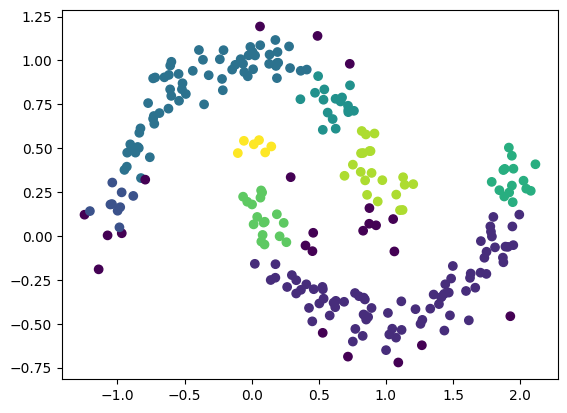

In [50]:
plt.scatter(x[:, 0], x[:, 1], c=dbscan.labels_)

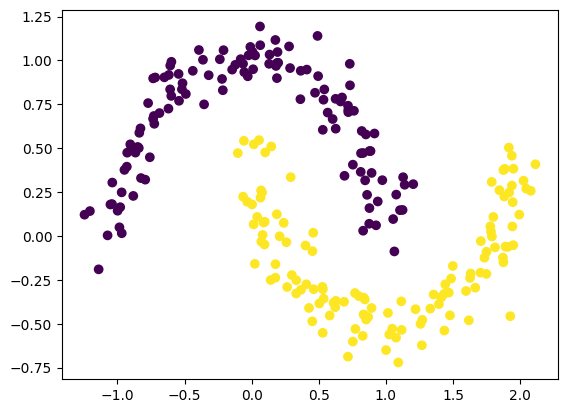

In [51]:
plt.scatter(x[:, 0], x[:, 1], c=y)